In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing, model_selection, ensemble, metrics, tree, linear_model, kernel_ridge
import xgboost as xgb
import lightgbm as lgb
%matplotlib inline
plt.style.use('fivethirtyeight')
import sys, time
from scipy import special, stats
from mlxtend import regressor

In [2]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [3]:
train.head(5)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Exploratory Data Analysis

To dig deep into our dataset,let's first understand the structure of the dataset

In [4]:
train.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

We can observe that there are 81 columns in our dataset which calls for some room for improvement. 

We will be particularly looking to merge some features and create some new out of the process. 

First let's create final training and test sets which will contain our new features and the merged old features, it will be a copy of the original training set

In [6]:
finalTrain = train.copy()
finalTest = test.copy()

Since the Sale Price is the column to predict and there are 81 columns, there are many ways to continue our EDA. First we will perform Outlier Analysis.

### Outlier Analysis

For this project, let's consider the columns with the highest correlation to the feature SalePrice. Let's take the features greater than 0.5 with respect to SalePrice.

In [7]:
corr = finalTrain.corr()['SalePrice'].sort_values(ascending=False)[:11]
corr

SalePrice       1.000000
OverallQual     0.790982
GrLivArea       0.708624
GarageCars      0.640409
GarageArea      0.623431
TotalBsmtSF     0.613581
1stFlrSF        0.605852
FullBath        0.560664
TotRmsAbvGrd    0.533723
YearBuilt       0.522897
YearRemodAdd    0.507101
Name: SalePrice, dtype: float64

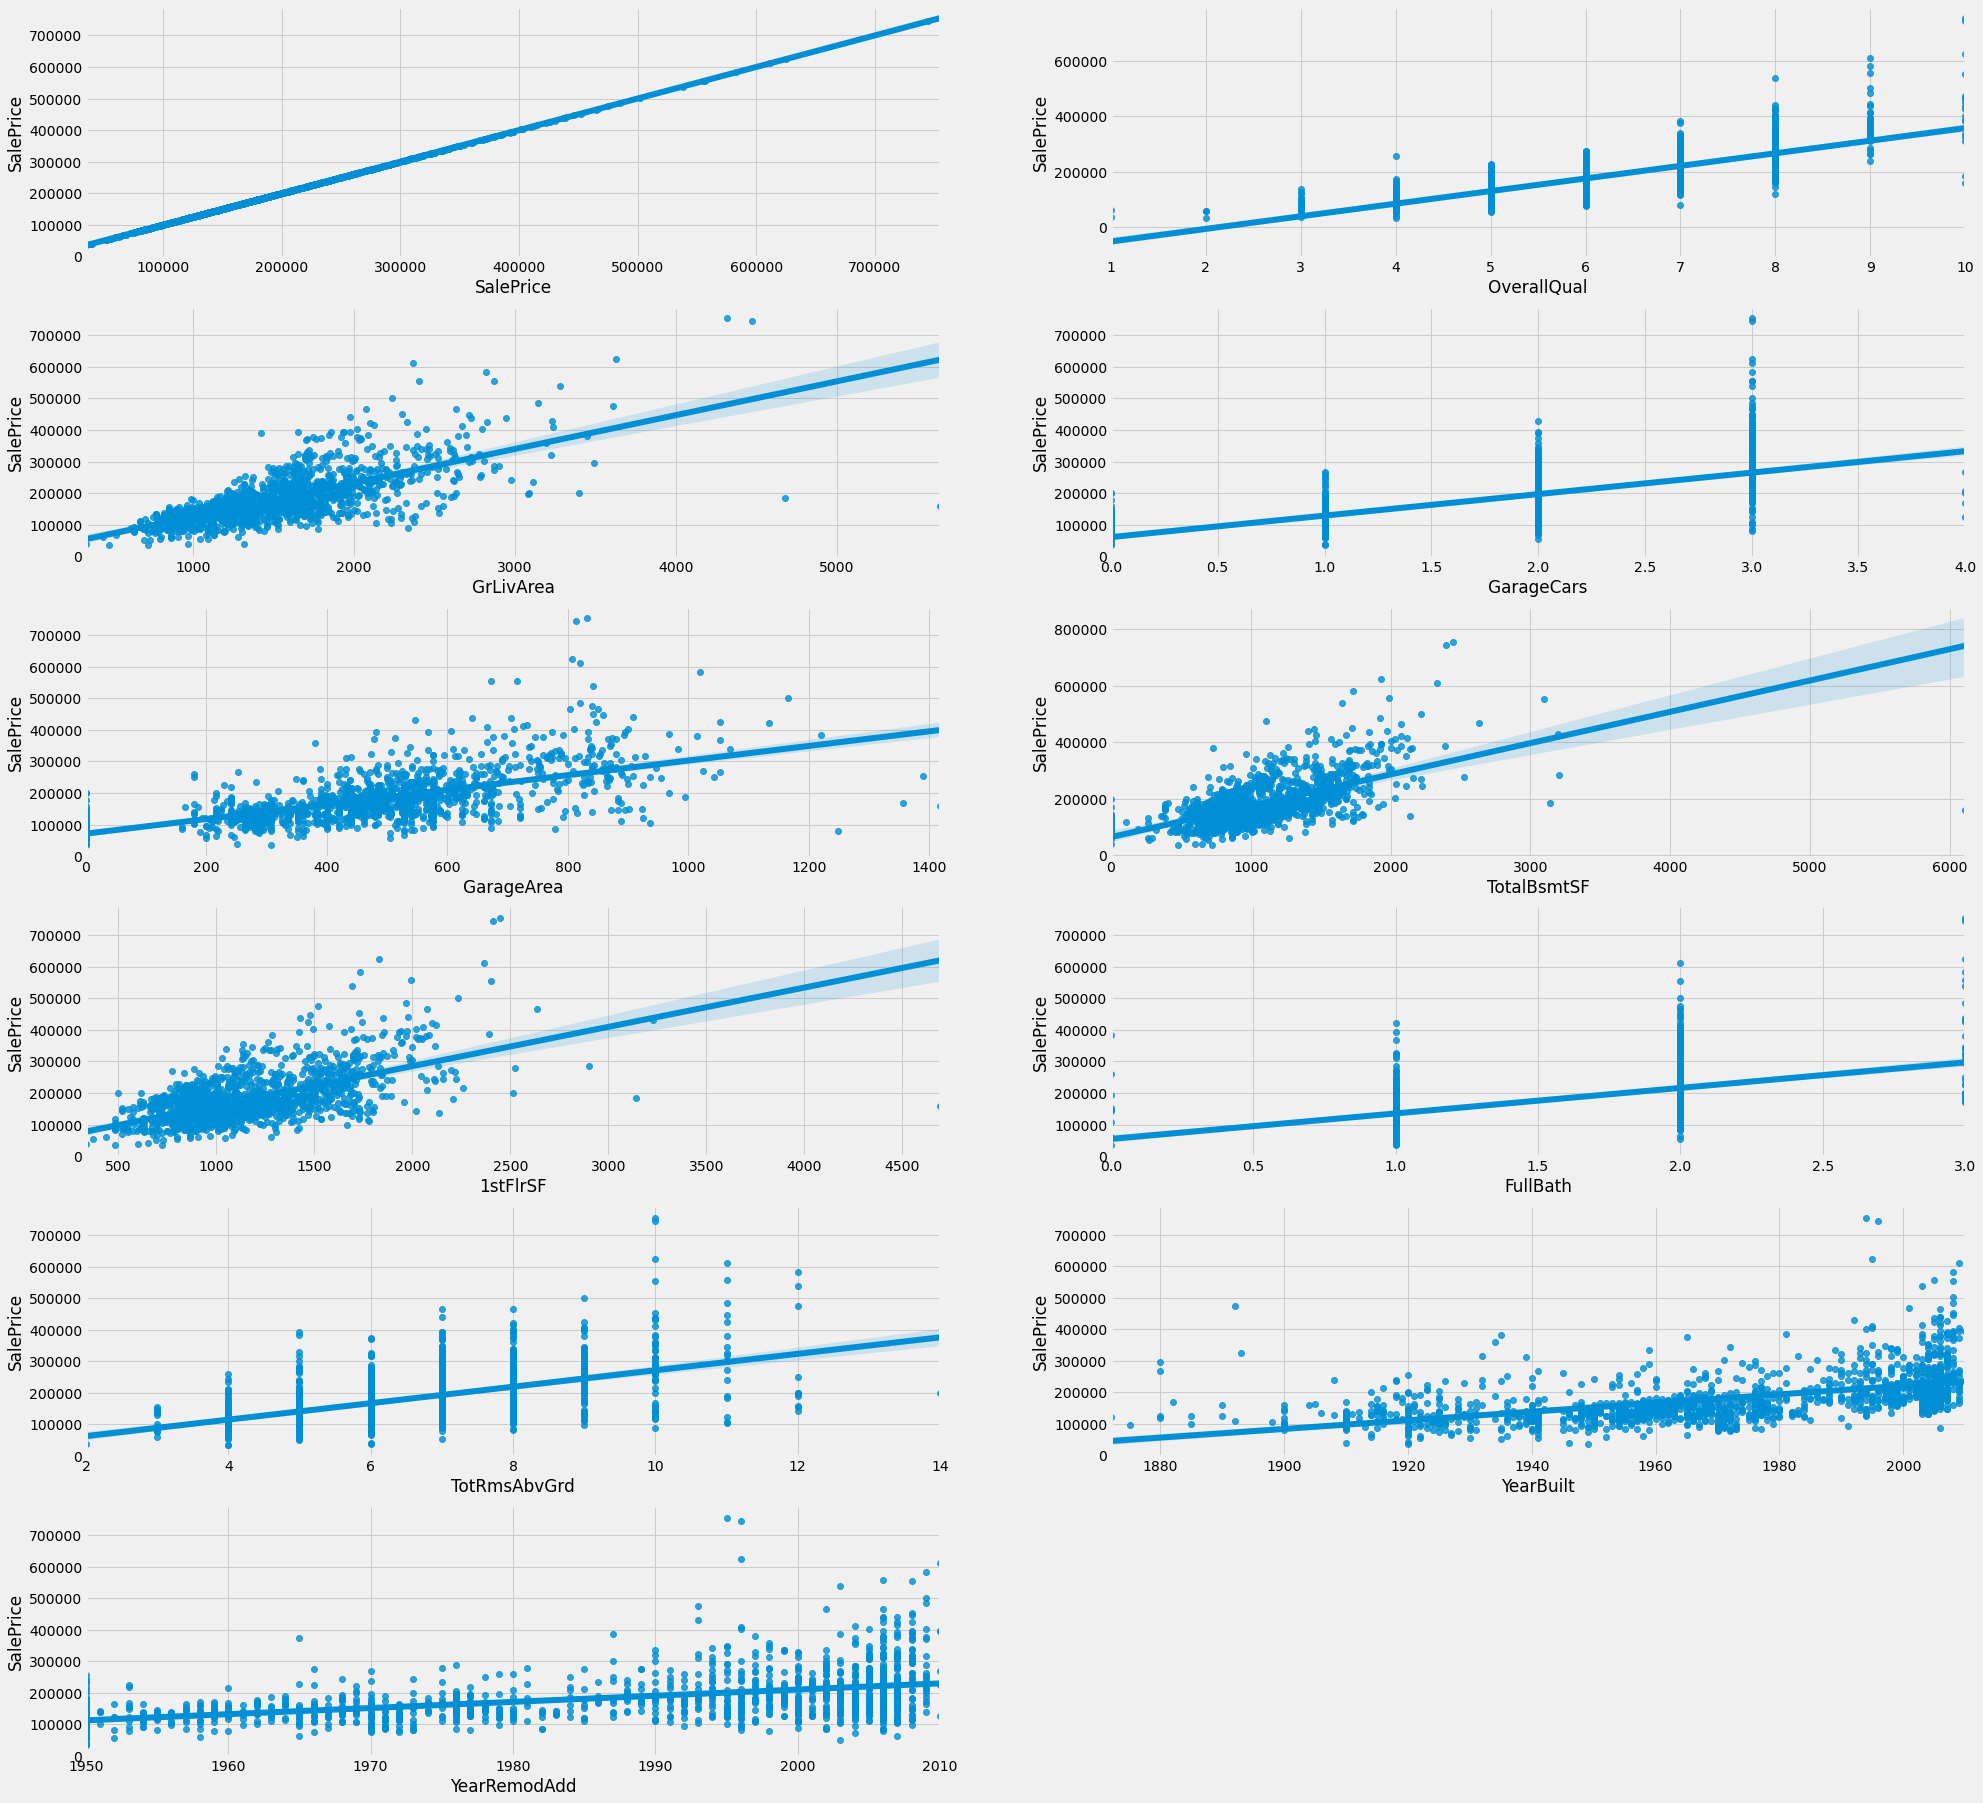

In [8]:
fig = plt.figure(figsize=[30,30])
for col,i in zip(corr.index,range(1,12)):
    axes = fig.add_subplot(6,2,i)
    sns.regplot(finalTrain[col],finalTrain.SalePrice,ax=axes)
plt.show()

Have an individual look at all the graphs here and try to determine and increasing or decreasing relationship between the features.

From these 10 plots we see that only **'GrLivArea'** has some outliers. Let's have a look at it individually.

Text(0.5, 1.0, 'Ground Living Area vs Sale Price')

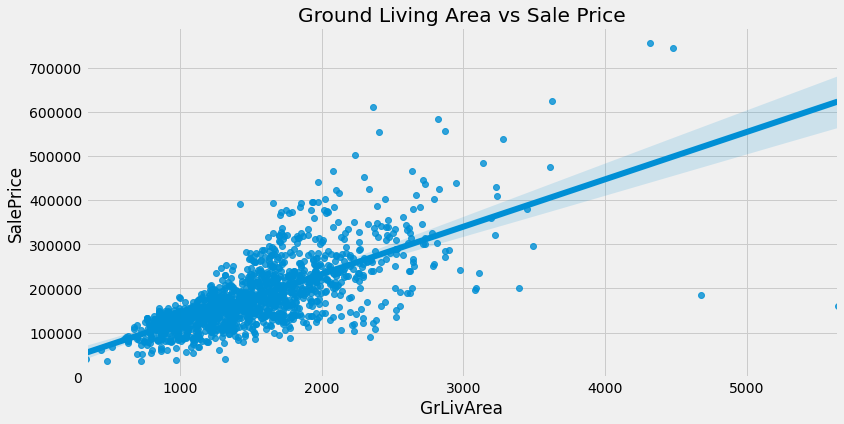

In [9]:
fig = plt.figure(figsize=[12,6])
sns.regplot(finalTrain.GrLivArea, finalTrain.SalePrice).set_title('Ground Living Area vs Sale Price')

You can see an increasing relationship between GrLivArea and SalePrice but there are a few outliers where GrLivArea is very high for a lower price. Safe to say we can remove these two rows for which we are seeing such anomaly.

In [10]:
finalTrain = finalTrain[finalTrain['GrLivArea']<4600]

Now Let's look at our regplot for GrLivArea vs SalePrice again

Text(0.5, 1.0, 'Ground Living Area vs Sale Price')

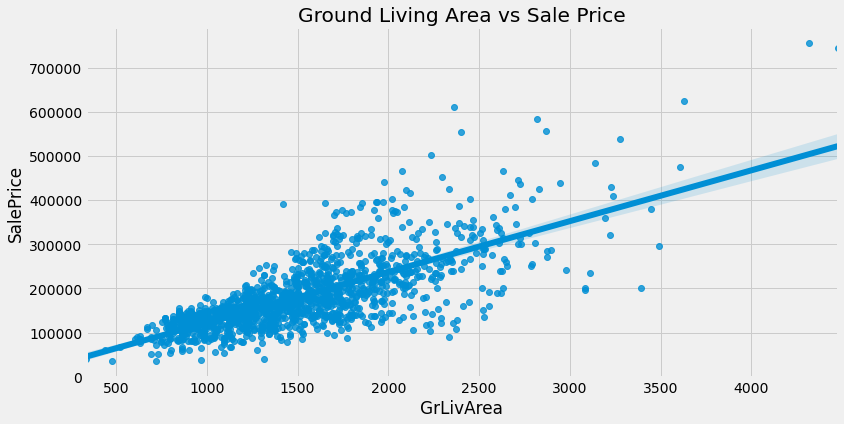

In [11]:
fig = plt.figure(figsize=[12,6])
sns.regplot(finalTrain.GrLivArea, finalTrain.SalePrice).set_title('Ground Living Area vs Sale Price')

Much Better, as now, we can see a complete increasing relationship between the two features.

### Skewness Check in the Column to be Predicted

We need to be sure that in order to calculate accurate predictions, our column which is to be predicted should not be skewed. Hence, checking the distribution of the column SalePrice.

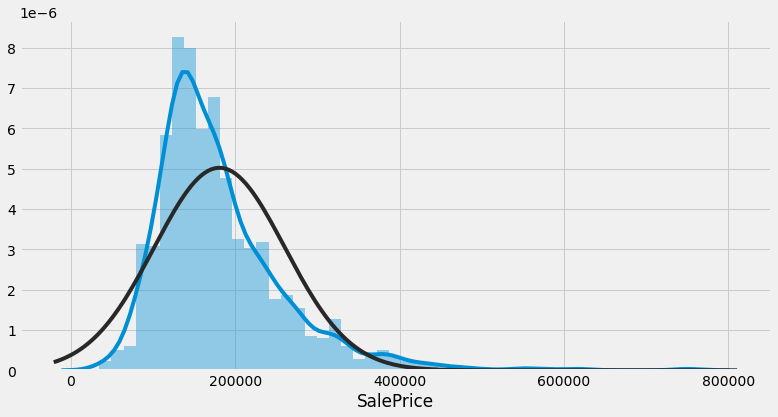

In [12]:
fig = plt.figure(figsize=[12,6])
sns.distplot(finalTrain.SalePrice, fit = stats.norm)

We see that our data is skewed, hence in order to bring it to normal values, we can apply log transformation over it in order to reduce the skewness.

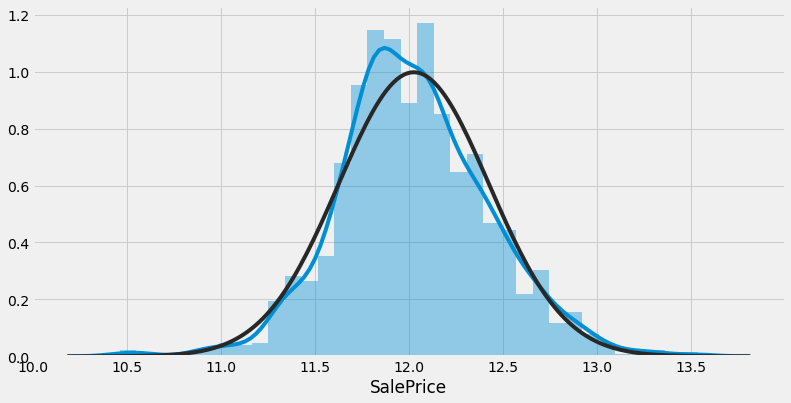

In [13]:
finalTrain['SalePrice'] = np.log(1+finalTrain['SalePrice'].values)

fig = plt.figure(figsize=[12,6])
sns.distplot(finalTrain.SalePrice, fit = stats.norm)

### Removing Irrelevant or High Correlated Columns

Also, to add some simplicity to our analysis, we will perform the following steps:

- Remove ID columns from Training and Test Sets (Irrelevant for Predictive Modelling)
- Find correlation between different values and remove columns with high correlation with each other, as well as the SalePrice column.
- Remove SalePrice column from the training data and storing in a different variable.
- Merge Training and Test sets to perform the rest of the EDA in order to maintain consistency. We will spli them later before applying our regression models.

**Step 1**: Removing ID Columns

In [14]:

IDTrain = finalTrain['Id']
IDTest = finalTest['Id']

finalTrain.drop('Id', axis = 1, inplace = True)
finalTest.drop('Id', axis = 1, inplace = True)

**Step 2**: Performing Correlation Analysis as mentioned above.

Text(0.5, 1.0, 'Correlation Matrix (HeatMap)')

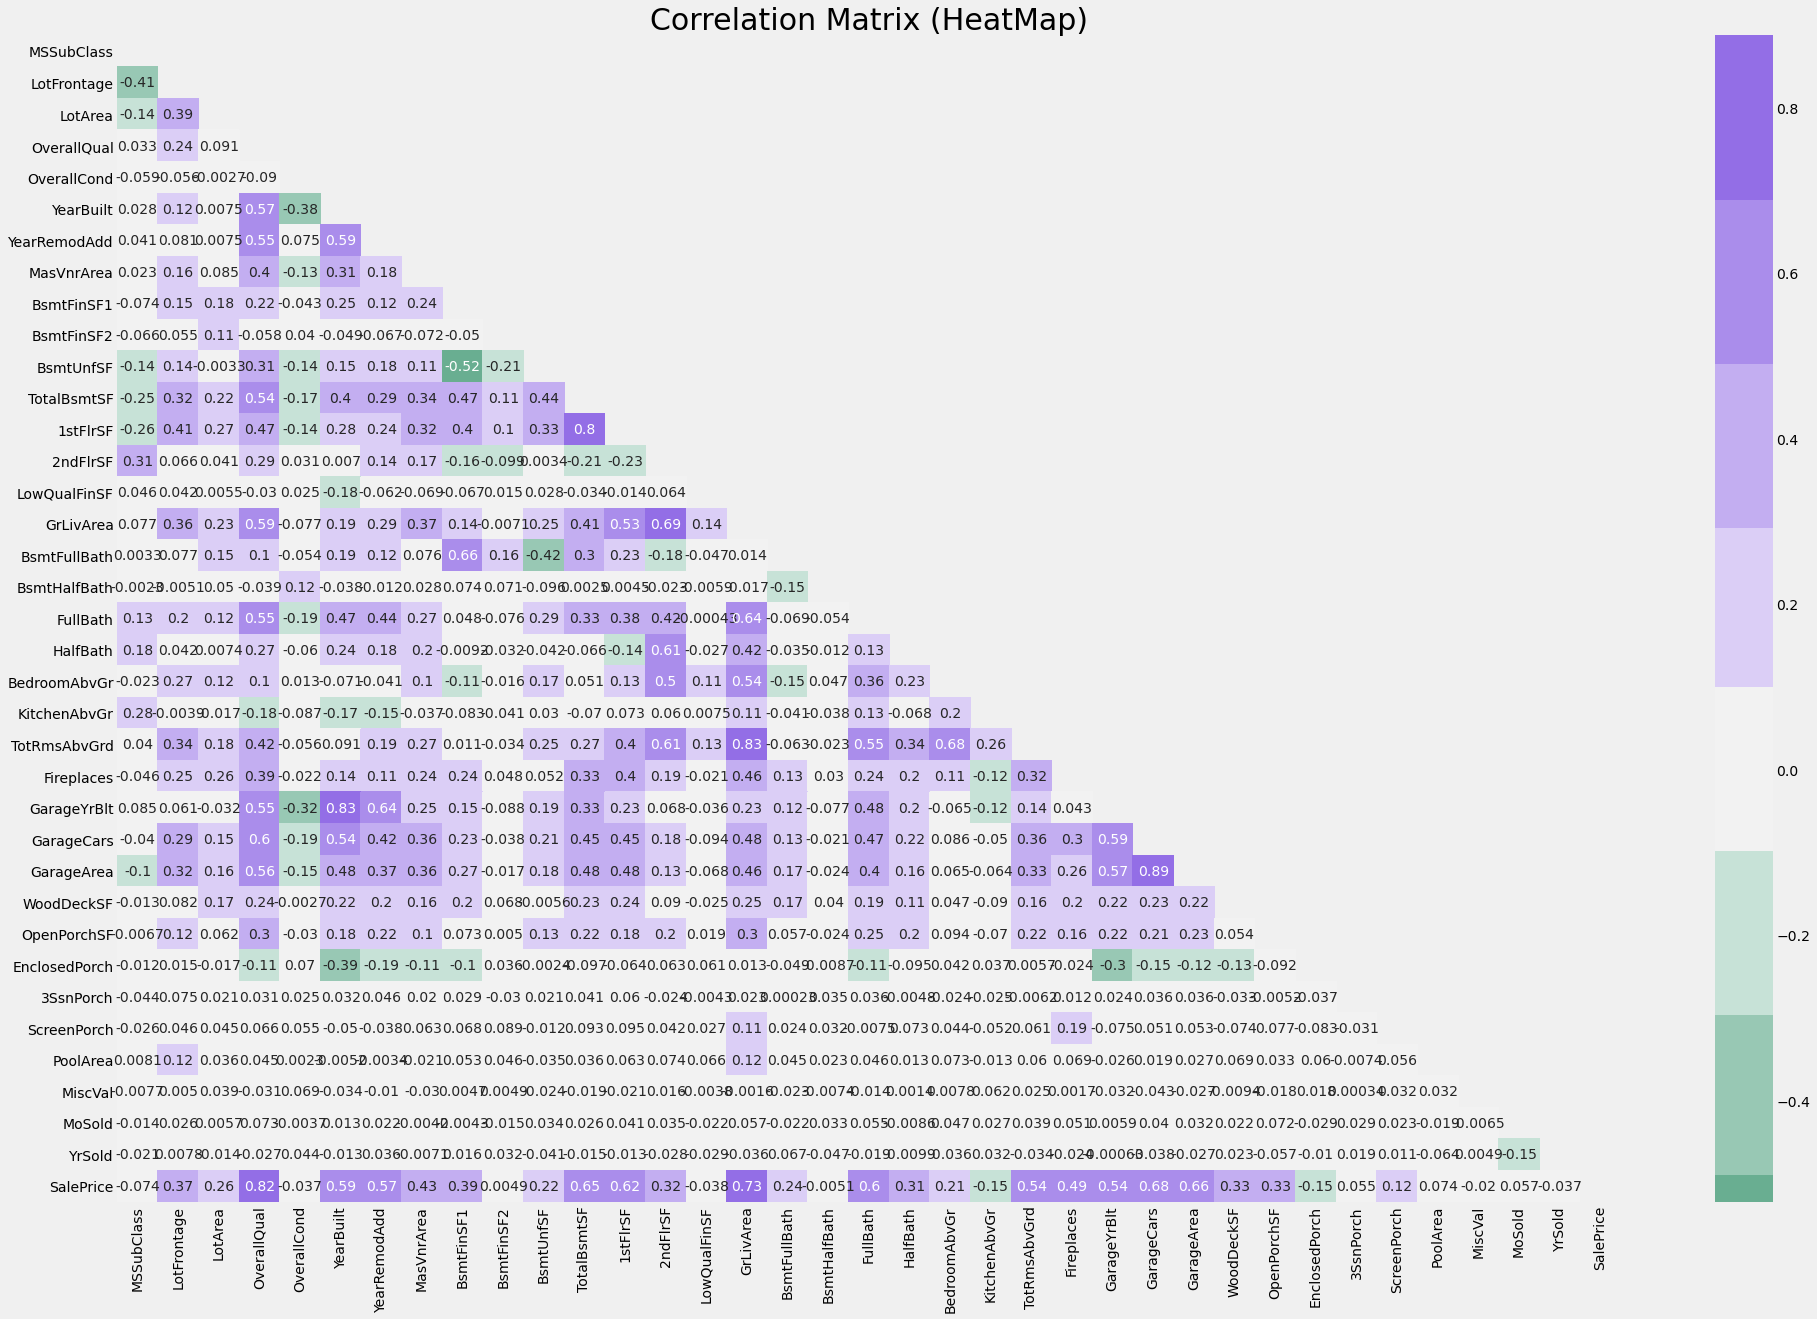

In [15]:
fig = plt.figure(figsize = [30,20])
mask = np.zeros_like(finalTrain.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(finalTrain.corr(), cmap=sns.diverging_palette(150, 275, s=80, l=55, n=9), mask = mask, annot=True, center = 0)
plt.title("Correlation Matrix (HeatMap)", fontsize = 30)

In [16]:
unstackedCorrelations = pd.DataFrame({'Correlations' : finalTrain.corr().abs().unstack()})
unstackedCorrelations = unstackedCorrelations.reset_index().sort_values(by='Correlations')
unstackedCorrelations[(unstackedCorrelations.Correlations > 0.8) & (unstackedCorrelations.Correlations < 1)]

,level_0,level_1,Correlations
455,1stFlrSF,TotalBsmtSF,0.803830
419,TotalBsmtSF,1stFlrSF,0.803830
1335,SalePrice,OverallQual,0.821405
147,OverallQual,SalePrice,0.821405
209,YearBuilt,GarageYrBlt,0.825317
893,GarageYrBlt,YearBuilt,0.825317
829,TotRmsAbvGrd,GrLivArea,0.829498
577,GrLivArea,TotRmsAbvGrd,0.829498
987,GarageArea,GarageCars,0.887304
951,GarageCars,GarageArea,0.887304


From the above table, we can draw the following conclusions:

- **GarageCars** and **GarageArea** are highly correlated to each other, and from the heatmap, both are highly correlated to the **SalePrice**. Hence, removing **GarageArea** from our analysis since it adds redundancy.
- **TotRmsAbvGrd** and **GrLivArea** are highly correlated to each other, and from our previous analysis to remove outliers from **GrLivArea**, we observed **GrLivArea** and **SalePrice** are highly correlated to each other. Hence, we remove **TotRmsAbvGrd** from our analysis since it adds redundancy.
- Similar analysis and assumptions are applicable to **GarageYrBlt** as well. Therefore, removing it from our data to avoid redundancy.
- **1stFlrSF** and **2ndFlrSF** are being kept intact as they will be added to feature engineering (in the later sections of this notebook)
- **SalePrice** and **OverallQual** are highly related to each other and should not be disturbed.

In [17]:
finalTrain.drop('GarageArea', axis = 1, inplace = True)
finalTrain.drop('TotRmsAbvGrd', axis = 1, inplace = True)
finalTrain.drop('GarageYrBlt', axis = 1, inplace = True)

finalTest.drop('GarageArea', axis = 1, inplace = True)
finalTest.drop('TotRmsAbvGrd', axis = 1, inplace = True)
finalTest.drop('GarageYrBlt', axis = 1, inplace = True)

**Step 3**: Removing SalePrice column

In [18]:
SalePriceTrain = finalTrain['SalePrice']

finalTrain.drop('SalePrice', axis = 1, inplace = True)

**Step 4**: Merging finalTrain and finalTest

In [19]:
print(finalTrain.shape)
print(finalTest.shape)

finalData = pd.concat([finalTrain,finalTest])

print(finalData.shape)

(1458, 76)
(1459, 76)
(2917, 76)


### Missing Data Handling

For the next part, we will consider how to handle NaNs for this project.

In [20]:
DataMissing = finalData.isnull().sum()*100/len(finalData)
DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
DataMissingByColumn.sort_values(by='Percentage Nulls',ascending=False,inplace=True)
DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

,Percentage Nulls
PoolQC,99.691464
MiscFeature,96.400411
Alley,93.212204
Fence,80.425094
FireplaceQu,48.680151
LotFrontage,16.660953
GarageFinish,5.450806
GarageQual,5.450806
GarageCond,5.450806
GarageType,5.382242


We can see the columns 'PoolQC', 'MiscFeature', 'Alley' and 'Fence' are almost nulls, hence we will remove those columns as our basic assumption is that they do not add to the predictions much.

In [21]:
finalData.drop('PoolQC', axis = 1, inplace=True)
finalData.drop('MiscFeature', axis = 1, inplace=True)
finalData.drop('Alley', axis = 1, inplace=True)
finalData.drop('Fence', axis = 1, inplace=True)

In order to handle NAs, we will replace the nulls in the columns of datatype 'object' with the mode of the respective column, whereas for the columns for datatypes 'integer', or 'float', we will replace the nulls with the median of the respective column.

In [22]:
objData = finalData.select_dtypes("object")

for i in objData:
    finalData[i].fillna(finalData[i].mode()[0], inplace = True)

intData = finalData.select_dtypes(["int64","float64"])

for i in intData:
    finalData[i].fillna(finalData[i].median(), inplace = True)

Rechecking for Nulls to make sure our piece above worked.

In [23]:
DataMissing = finalData.isnull().sum()*100/len(finalData)
DataMissingByColumn = pd.DataFrame({'Percentage Nulls':DataMissing})
DataMissingByColumn.sort_values(by='Percentage Nulls',ascending=False,inplace=True)
DataMissingByColumn[DataMissingByColumn['Percentage Nulls']>0]

,Percentage Nulls


Therefore, there are no nulls remaining. Hence, we are in a good position to move to the next step in our analysis.

# Feature Engineering

Let's deep dive into our dataset again. We can see 4 columns related to Bath:

- BsmtFullBath
- BsmtHalfBath
- FullBath
- HalfBath

We can create a new feature from these 4 columns to 2 by using the process where Half Bath = 1/2 * Full Bath and adding it to the Full Bath columns.

In [24]:
finalData['TotalBaths'] = finalData['BsmtFullBath'] + 0.5 * finalData['BsmtHalfBath'] + finalData['FullBath'] + 0.5 * finalData['HalfBath']

We can create another feature where we can monitor the age of house from its selling date to the last time it was remodelled.

In [25]:
finalData['HouseAge'] = finalData['YrSold'] - finalData['YearRemodAdd']

After diving into our dataset more, another feature we can create is the Total Number of Porches by combining the following columns:

- OpenPorchSF	
- EnclosedPorch	
- 3SsnPorch	
- ScreenPorch

In [26]:
finalData['TotalPorches'] = finalData['OpenPorchSF'] + finalData['EnclosedPorch'] + finalData['3SsnPorch'] + finalData['ScreenPorch']

The 4th feature which we will be adding is the Season feature. As you can see the MoSold column, which suggests the Month the house was sold. But since the column is an integer from 1 to 12, it can be interpreted as levels during modelling. Hence, we group those values as:

- 10,11,12,1,2,3 - Winter
- 4,5,6,7,8,9 - Summer

In [27]:
finalData['Season'] = np.where(finalData['MoSold'].isin([10,11,12,1,2,3]),'Winter','Summer')

The 5th Feature that we will make is the overall average rating of the house to determine its price. We will do that by taking the arithmetic average of the **OverallQual** and **OverallCond**

In [28]:
finalData['OverallRate'] = 0.5 * (finalData['OverallQual'] + finalData['OverallCond'])

Creating two more features of the total number of square foots in a house which will be the sum of basement, 1st floor and the 2nd floor.

In [29]:
finalData['TotalSF'] = finalData['TotalBsmtSF'] + finalData['1stFlrSF'] + finalData['2ndFlrSF']

In [30]:
print(finalData.shape)

(2917, 78)


### Skewness Check in all the columns


Now checking the skewness for all the columns integer columns. We are doing this practice in order to reduce the skewness in our dataset. We need the values to be more normal in order to make our analyses simpler. Box Cox Transformation is one such method of doing this which reduces the skewness of our data & helps us conduct a variety of tests. More of this can be found [here](https://www.statisticshowto.com/box-cox-transformation/#:~:text=A%20Box%20Cox%20transformation%20is,a%20broader%20number%20of%20tests.)

In [31]:
nonObjectColList = finalData.dtypes[finalData.dtypes != 'object'].index

skewMeasure = finalData[nonObjectColList].apply(lambda x: stats.skew(x.dropna())).sort_values(ascending = False)

skewMeasure=pd.DataFrame({'skew':skewMeasure})

skewMeasure = skewMeasure[abs(skewMeasure)>0.5].dropna()

skewMeasure


,skew
MiscVal,21.939672
PoolArea,17.688664
LotArea,13.109495
LowQualFinSF,12.084539
3SsnPorch,11.372080
KitchenAbvGr,4.300550
BsmtFinSF2,4.144503
EnclosedPorch,4.002344
ScreenPorch,3.945101
BsmtHalfBath,3.929996


Here we can see there are skewness in many columns. Hence, we will apply Box Cox transformation to all these columns in order to reduce their skewness. We would consider lambda as 0, to apply log transformation.

In [32]:
for i in skewMeasure.index:
    finalData[i] = special.boxcox1p(finalData[i],0.15) #lambda = 0.15

Since, BoxCox Transformation has reduced the skewness in our data. We move on the next step of our notebook.

### One Hot Encoding

Finally, we convert all the remaining categorical columns into dummies i.e. One Hot Encoding to make our analysis simpler and better for the machine to understand in order to perform predictive modelling.

In [33]:
finalData = pd.get_dummies(finalData)

print(finalData.shape)

(2917, 278)


Now, we plan to remove the columns with a very low Standard Deviation in its values. As a lower SD will only increase the complexity to our predictive modelling. Removing columns with SD below 0.025.

In [34]:
stdDev = finalData.std().sort_values()
removeList = stdDev[stdDev < 0.025]

for i in removeList.index:
    finalData.drop(i, axis = 1, inplace = True)
print(finalData.shape)

(2917, 267)


Converting all columns into numerical values makes our life a bit easier when performing predictive modelling. Now we are ready to implement a few models on this training set.

# Model Training

## Train-Test Split

Splitting our Training and Test in 70-30 proportions.

In [35]:
trainDF = finalData[:len(finalTrain)]
testDF = finalData[len(finalTest)-1:]
print(trainDF.shape)
print(testDF.shape)

(1458, 267)
(1459, 267)


In [36]:
xTrain, xTest, yTrain, yTest = model_selection.train_test_split(trainDF.to_numpy(),SalePriceTrain.to_numpy(),test_size=0.2,random_state=1010)

## LightGBM

**Hyperparameter Tuning**

In [37]:
lgbAttributes = lgb.LGBMRegressor(objective='regression', n_jobs=-1, random_state=1010)
                               

lgbParameters = {
    'max_depth' : [2,3,5],
    'learning_rate': [0.01,0.05, 0.1],
    'colsample_bytree' : [1,1.1,1.2,1.3,1.5],
    'n_estimators' : [480,600,720],
    'num_leaves' : [4,5,6,7],
    'max_bin' : [50,100,150,200],
    'verbose' : [-1],
    'bagging_seed' : [7],
    'bagging_freq' : [3,5,7,9],
    'bagging_fraction' : [0.7,0.8,0.9],
    'feature_fraction' : [0.2319,0.25,0.27,0.3,0.33],
    'feature_fraction_seed' : [7],
    'min_data_in_leaf' : [2,3,4,5,6],
    'min_sum_hessian_in_leaf' : [15,16,18,20]
}


In [38]:
lgbModel = model_selection.RandomizedSearchCV(lgbAttributes, param_distributions = lgbParameters, cv = 5, random_state=1010)

start = time.time()
lgbModel.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training took {:.2f} mins'.format((end-start)/60))

lgbPred = lgbModel.predict(xTest)

Training took 0.25 mins


In [39]:
lgbModel.best_estimator_

LGBMRegressor(bagging_fraction=0.9, bagging_freq=5, bagging_seed=7,
              colsample_bytree=1.2, feature_fraction=0.2319,
              feature_fraction_seed=7, max_bin=200, max_depth=2,
              min_data_in_leaf=5, min_sum_hessian_in_leaf=15, n_estimators=480,
              num_leaves=7, objective='regression', random_state=1010,
              verbose=-1)

In [40]:
LGBMMetrics = pd.DataFrame({'Model': 'LightGBM', 
                            'MSE': metrics.mean_squared_error(yTest, lgbPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, lgbPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, lgbPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, lgbPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, lgbPred)),
                            'R-Square' : metrics.r2_score(yTest, lgbPred)},index=[1])

LGBMMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
1,LightGBM,0.012752,0.112924,0.080062,0.000076,0.008725,0.914058


Text(0, 0.5, 'Actual')

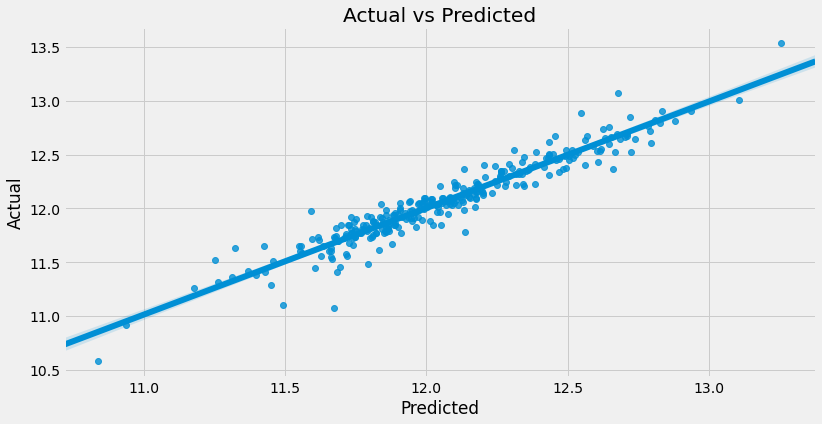

In [41]:
fig = plt.figure(figsize=[12,6])
sns.regplot(lgbPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

#### Actual vs Predicted

In [42]:
LGBMAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(lgbPred)})
LGBMAvP

,Actual,Predicted
0,234001.0,186089.075119
1,231501.0,214389.073343
2,135001.0,142071.010683
3,80001.0,93936.553928
4,143251.0,139388.025597
...,...,...
287,140201.0,136660.290671
288,129001.0,129170.367178
289,139001.0,145308.887188
290,320001.0,331262.910903


## Lasso & LassoCV

In [43]:
lasAttributes = linear_model.Lasso(alpha=0.0005, max_iter = 2000, random_state=1010)
lasAttributesCV = linear_model.LassoCV(max_iter = 2000, cv=5, verbose=-1, random_state=1010, n_jobs=-1)

- **LASSO**

In [44]:
start = time.time()
lasAttributes.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for Lasso took {:.2f} mins'.format((end-start)/60))

lasPred = lasAttributes.predict(xTest)

Training for Lasso took 0.01 mins


In [45]:
LASMetrics = pd.DataFrame({'Model': 'Lasso', 
                            'MSE': metrics.mean_squared_error(yTest, lasPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, lasPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, lasPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, lasPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, lasPred)),
                            'R-Square' : metrics.r2_score(yTest, lasPred)},index=[2])

LASMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
2,Lasso,0.010175,0.100873,0.071713,0.000061,0.007807,0.931422


Text(0, 0.5, 'Actual')

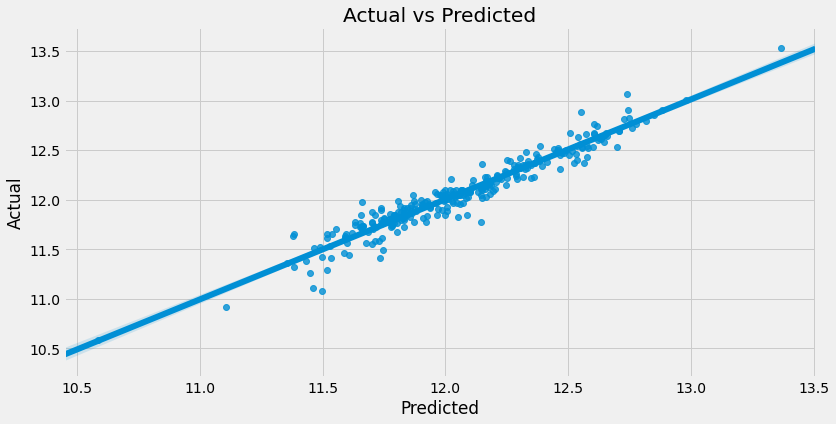

In [46]:
plt.figure(figsize=[12,6])
sns.regplot(lasPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [47]:
LASAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(lasPred)})
LASAvP

,Actual,Predicted
0,234001.0,189147.416983
1,231501.0,214796.542826
2,135001.0,131035.239375
3,80001.0,100379.614285
4,143251.0,135921.144146
...,...,...
287,140201.0,129639.085810
288,129001.0,120843.772397
289,139001.0,138996.440338
290,320001.0,312540.128831


- **LASSOCV**

In [48]:
start = time.time()
lasAttributesCV.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for LassoCV took {:.2f} mins'.format((end-start)/60))

lasCVPred = lasAttributesCV.predict(xTest)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
................................................................................................................................................................................................................................................................................................................................................................................................................[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.4s remaining:    0.7s
....................................................................................................[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.6s finished


Training for LassoCV took 0.01 mins


In [49]:
LASCVMetrics = pd.DataFrame({'Model': 'LassoCV', 
                            'MSE': metrics.mean_squared_error(yTest, lasCVPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, lasCVPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, lasCVPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, lasCVPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, lasCVPred)),
                            'R-Square' : metrics.r2_score(yTest, lasCVPred)},index=[3])

LASCVMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
3,LassoCV,0.013858,0.117722,0.085809,0.000083,0.00912,0.9066


Text(0, 0.5, 'Actual')

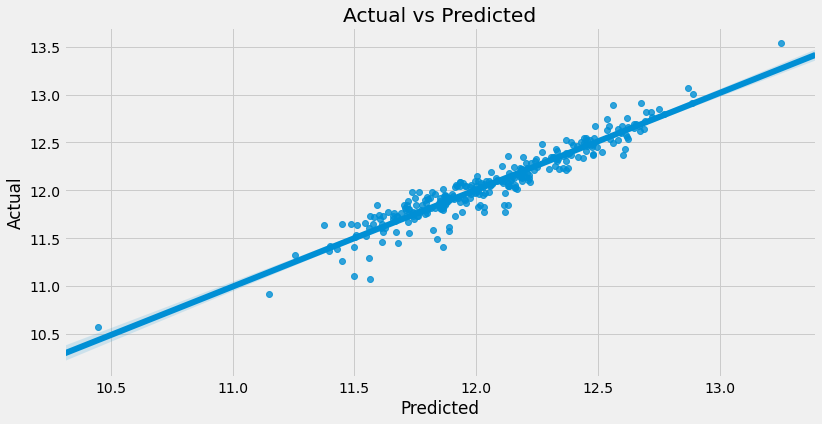

In [50]:
plt.figure(figsize=[12,6])
sns.regplot(lasCVPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [51]:
LASCVAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(lasCVPred)})
LASCVAvP

,Actual,Predicted
0,234001.0,185704.786031
1,231501.0,220874.629854
2,135001.0,134966.852274
3,80001.0,104837.212513
4,143251.0,139471.830469
...,...,...
287,140201.0,126887.420853
288,129001.0,119360.083062
289,139001.0,143155.652741
290,320001.0,317592.358775


## Ridge & RidgeCV

In [52]:
ridAttributes = linear_model.Ridge(alpha=5, max_iter=2000, random_state=1010)
ridCVAttributes = linear_model.RidgeCV(alphas=(1,5,10), cv=5)

- **RIDGE**

In [53]:
start = time.time()
ridAttributes.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for Ridge took {:.2f} mins'.format((end-start)/60))

ridPred = ridAttributes.predict(xTest)

Training for Ridge took 0.00 mins


In [54]:
RIDMetrics = pd.DataFrame({'Model': 'Ridge', 
                            'MSE': metrics.mean_squared_error(yTest, ridPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, ridPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, ridPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, ridPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, ridPred)),
                            'R-Square' : metrics.r2_score(yTest, ridPred)},index=[4])

RIDMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
4,Ridge,0.010664,0.103268,0.071903,0.000064,0.008007,0.928127


Text(0, 0.5, 'Actual')

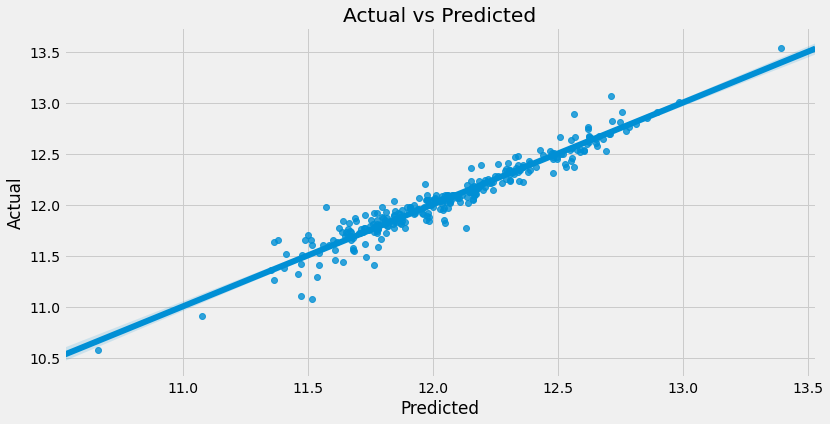

In [55]:
plt.figure(figsize=[12,6])
sns.regplot(ridPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [56]:
RIDAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(ridPred)})
RIDAvP

,Actual,Predicted
0,234001.0,189831.137521
1,231501.0,218298.522936
2,135001.0,132088.286325
3,80001.0,102278.615695
4,143251.0,133128.524246
...,...,...
287,140201.0,130291.594320
288,129001.0,122004.045976
289,139001.0,139263.390963
290,320001.0,315759.266482


- **RidgeCV**

In [57]:
start = time.time()
ridCVAttributes.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for RidgeCV took {:.2f} mins'.format((end-start)/60))

ridCVPred = ridCVAttributes.predict(xTest)

Training for RidgeCV took 0.00 mins


In [58]:
RIDCVMetrics = pd.DataFrame({'Model': 'RidgeCV', 
                            'MSE': metrics.mean_squared_error(yTest, ridCVPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, ridCVPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, ridCVPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, ridCVPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, ridCVPred)),
                            'R-Square' : metrics.r2_score(yTest, ridCVPred)},index=[5])

RIDCVMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
5,RidgeCV,0.010496,0.102448,0.071694,0.000063,0.007935,0.929263


Text(0, 0.5, 'Actual')

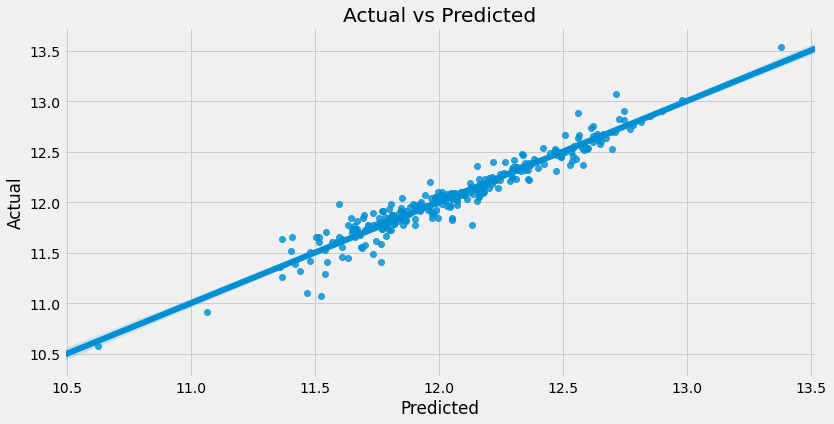

In [59]:
plt.figure(figsize=[12,6])
sns.regplot(ridCVPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [60]:
RIDCVAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(ridCVPred)})
RIDCVAvP

,Actual,Predicted
0,234001.0,189266.805467
1,231501.0,218895.275290
2,135001.0,133528.068392
3,80001.0,102676.896331
4,143251.0,134934.208845
...,...,...
287,140201.0,130804.397330
288,129001.0,121900.168424
289,139001.0,139791.973390
290,320001.0,314709.766022


## XGBoost

**Hyperparameter Tuning**

In [61]:
xgbAttributes = xgb.XGBRegressor(n_jobs=-1, random_state=1010)

xgbParameters = {
      
    'max_depth' : [2,3],
    'learning_rate': [0.01,0.05, 0.1],
    'colsample_bytree' : [0.4,0.6,0.8],
    'n_estimators' : [1000,2000],
    'gamma' : [0.15,0.3,0.5],
    'subsample': [0.6,0.7,0.8], #,0.9,1
    'min_child_weight': [3,4,5],#6,10
    'scale_pos_weight': [10,20],
    'reg_alpha' : [0.5,0.75],
    'reg_lambda' : [0.5,0.75],
    #'num_leaves' : [3,4],
    'max_bin' : [200],
}

xgbModel = model_selection.RandomizedSearchCV(xgbAttributes, param_distributions = xgbParameters, cv = 5, random_state=1010)

start = time.time()
xgbModel.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for XGBoost took {:.2f} mins'.format((end-start)/60))

xgbPred = xgbModel.predict(xTest)

Training for XGBoost took 5.21 mins


In [62]:
XGBMetrics = pd.DataFrame({'Model': 'XGBoost', 
                            'MSE': metrics.mean_squared_error(yTest, xgbPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, xgbPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, xgbPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, xgbPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, xgbPred)),
                            'R-Square' : metrics.r2_score(yTest, xgbPred)},index=[6])

XGBMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
6,XGBoost,0.014733,0.121379,0.088414,0.000088,0.009358,0.900707


Text(0, 0.5, 'Actual')

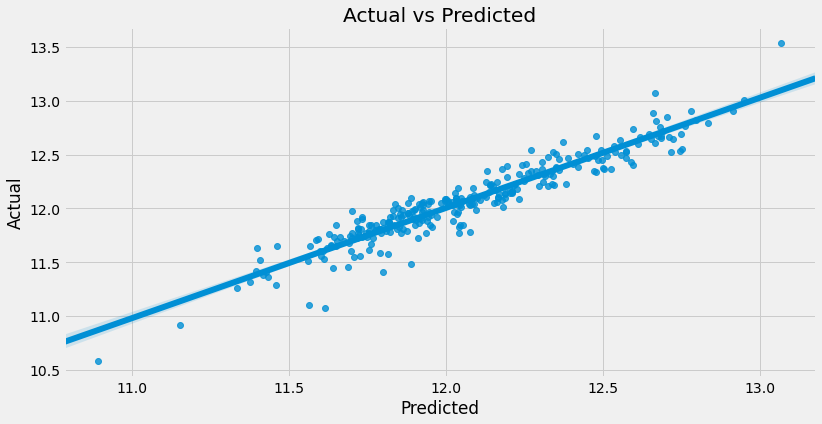

In [63]:
plt.figure(figsize=[12,6])
sns.regplot(xgbPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [64]:
XGBAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(xgbPred)})
XGBAvP

,Actual,Predicted
0,234001.0,194625.421875
1,231501.0,213445.187500
2,135001.0,139330.421875
3,80001.0,94615.789062
4,143251.0,135840.765625
...,...,...
287,140201.0,137924.031250
288,129001.0,126078.789062
289,139001.0,147303.515625
290,320001.0,319829.968750


## AdaBoost

**Hyperparameter Tuning**

In [65]:
adaAttributes = ensemble.AdaBoostRegressor(base_estimator = tree.DecisionTreeRegressor(max_depth=5), random_state = 1010)

adaParameters = {
    'learning_rate':[0.05,0.1],
    'n_estimators' : [800,1600]
}

adaModel = model_selection.RandomizedSearchCV(adaAttributes, param_distributions = adaParameters, cv = 5, random_state=1010)

start = time.time()
adaModel.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for AdaBoost took {:.2f} mins'.format((end-start)/60))

adaPred = adaModel.predict(xTest)

C:\Users\Hp\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:282: UserWarning: The total space of parameters 4 is smaller than n_iter=10. Running 4 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Training for AdaBoost took 8.82 mins


In [66]:
ADAMetrics = pd.DataFrame({'Model': 'AdaBoost', 
                            'MSE': metrics.mean_squared_error(yTest, adaPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, adaPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, adaPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, adaPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, adaPred)),
                            'R-Square' : metrics.r2_score(yTest, adaPred)},index=[7])

ADAMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
7,AdaBoost,0.01835,0.135464,0.103294,0.000109,0.01046,0.876326


Text(0, 0.5, 'Actual')

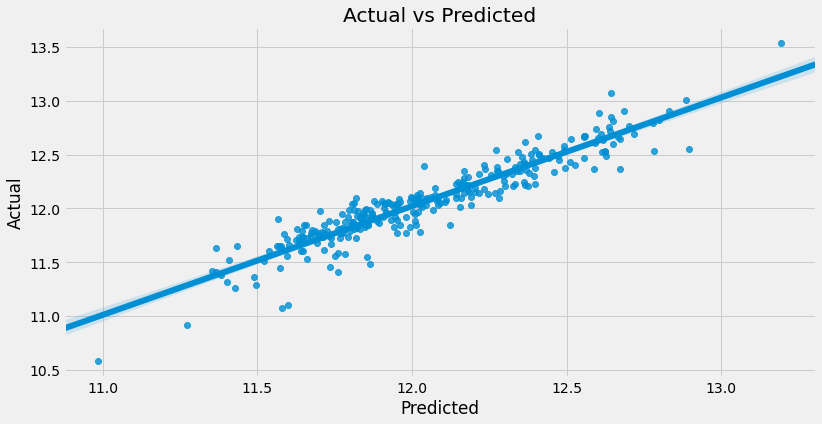

In [67]:
plt.figure(figsize=[12,6])
sns.regplot(adaPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [68]:
AdaAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(adaPred)})
AdaAvP

,Actual,Predicted
0,234001.0,206182.892329
1,231501.0,215179.023329
2,135001.0,128236.669065
3,80001.0,98207.382317
4,143251.0,131206.435801
...,...,...
287,140201.0,140946.216328
288,129001.0,117347.074716
289,139001.0,141003.818942
290,320001.0,283893.978992


## Gradient Boosting

**Hyperparameter Tuning**

In [69]:
grbAttributes = ensemble.GradientBoostingRegressor(random_state=1010)

grbParameters = {
    'n_estimators': [5000,6000],
    'max_depth' : [3,4,5],
    'learning_rate' : [0.01,0.05,0.1],
    'max_features' : ['sqrt'],
    'loss' : ['huber'],
    'min_samples_leaf' : [10,15],
    'min_samples_split' : [10,15]
}

grbModel = model_selection.RandomizedSearchCV(grbAttributes, param_distributions = grbParameters, cv=5, random_state=1010)

start = time.time()
grbModel.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for Gradient Boosting took {:.2f} mins'.format((end-start)/60))

grbPred = grbModel.predict(xTest)

Training for Gradient Boosting took 576.26 mins


In [70]:
GRBMetrics = pd.DataFrame({'Model': 'Gradient Boosting', 
                            'MSE': metrics.mean_squared_error(yTest, grbPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, grbPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, grbPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, grbPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, grbPred)),
                            'R-Square' : metrics.r2_score(yTest, grbPred)},index=[8])

GRBMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
8,Gradient Boosting,0.010546,0.102696,0.07174,0.000063,0.007939,0.928922


Text(0, 0.5, 'Actual')

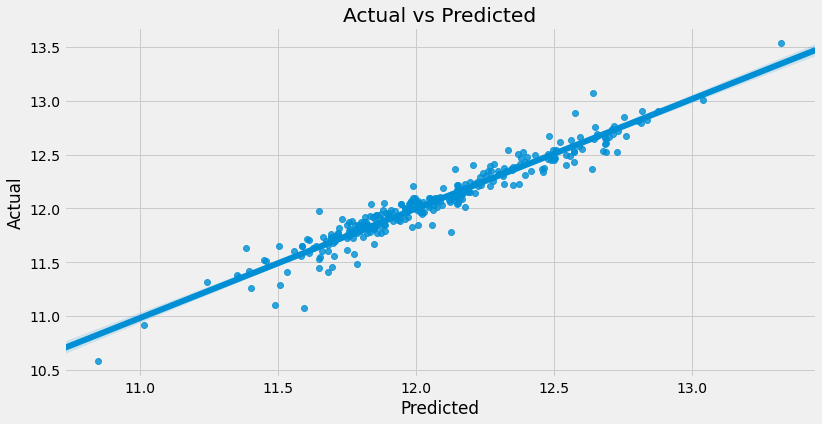

In [71]:
plt.figure(figsize=[12,6])
sns.regplot(grbPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [72]:
GrbAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(grbPred)})
GrbAvP

,Actual,Predicted
0,234001.0,187465.531794
1,231501.0,211438.027882
2,135001.0,139588.738443
3,80001.0,99263.698204
4,143251.0,135922.891142
...,...,...
287,140201.0,135212.844328
288,129001.0,129203.380686
289,139001.0,144576.787323
290,320001.0,347434.283094


## Random Forest

**Hyperparameter Tuning**

In [73]:
rfAttributes = ensemble.RandomForestRegressor(n_jobs = -1, random_state=1010)

rfParameters = {
    'n_estimators' : [1000,1500],
    'max_depth' : [5,10,15],
    'min_samples_leaf' : [4,5],
    'min_samples_split' : [5,10],
    'oob_score' : [True]
}

rfModel = model_selection.RandomizedSearchCV(rfAttributes, param_distributions = rfParameters, cv=5, random_state = 1010)

start = time.time()
rfModel.fit(xTrain, yTrain.flatten())
end = time.time()

print('Training for Random Forest took {:.2f} mins'.format((end-start)/60))

rfPred = rfModel.predict(xTest)

Training for Random Forest took 13.07 mins


In [74]:
RFMetrics = pd.DataFrame({'Model': 'Random Forest', 
                            'MSE': metrics.mean_squared_error(yTest, rfPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, rfPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, rfPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, rfPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, rfPred)),
                            'R-Square' : metrics.r2_score(yTest, rfPred)},index=[9])

RFMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
9,Random Forest,0.016542,0.128615,0.093754,0.000099,0.009964,0.888515


Text(0, 0.5, 'Actual')

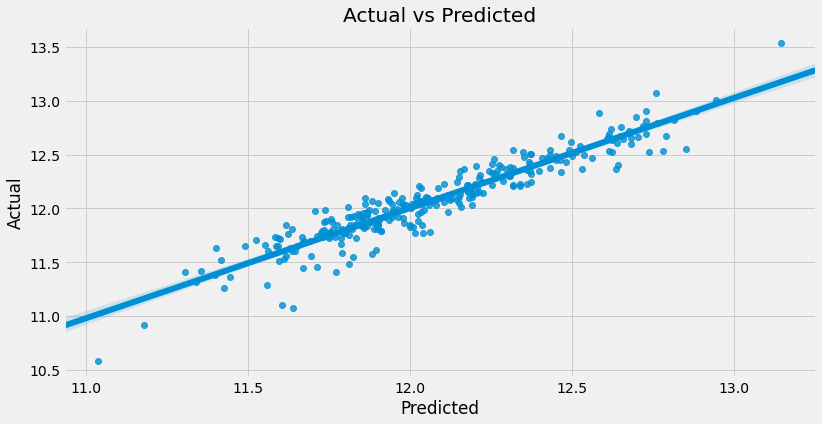

In [75]:
plt.figure(figsize=[12,6])
sns.regplot(rfPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [76]:
rfAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(rfPred)})
rfAvP

,Actual,Predicted
0,234001.0,192198.490436
1,231501.0,207592.284262
2,135001.0,146855.109353
3,80001.0,104743.043963
4,143251.0,127918.167347
...,...,...
287,140201.0,135481.123299
288,129001.0,125494.185621
289,139001.0,147073.470323
290,320001.0,358882.854322


## Stacking

In [77]:
stckAttributes = regressor.StackingCVRegressor(regressors = (lasAttributes, lgbModel, lasAttributesCV, ridAttributes, ridCVAttributes),
                                               random_state = 1010,
                                               meta_regressor = lgbModel, use_features_in_secondary = True)

start = time.time()
stckAttributes.fit(xTrain,yTrain.flatten())
end = time.time()

print('Training for Stacking took {:.2f} mins'.format((end-start)/60))

stckPred = stckAttributes.predict(xTest)

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.2s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.3s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of   5 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:    0.1s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_

Training for Stacking took 2.11 mins


In [78]:
STCKMetrics = pd.DataFrame({'Model': 'Stacking', 
                            'MSE': metrics.mean_squared_error(yTest, stckPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, stckPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, stckPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, stckPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, stckPred)),
                            'R-Square' : metrics.r2_score(yTest, stckPred)},index=[10])

STCKMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
10,Stacking,0.01098,0.104786,0.073849,0.000066,0.00812,0.925999


Text(0, 0.5, 'Actual')

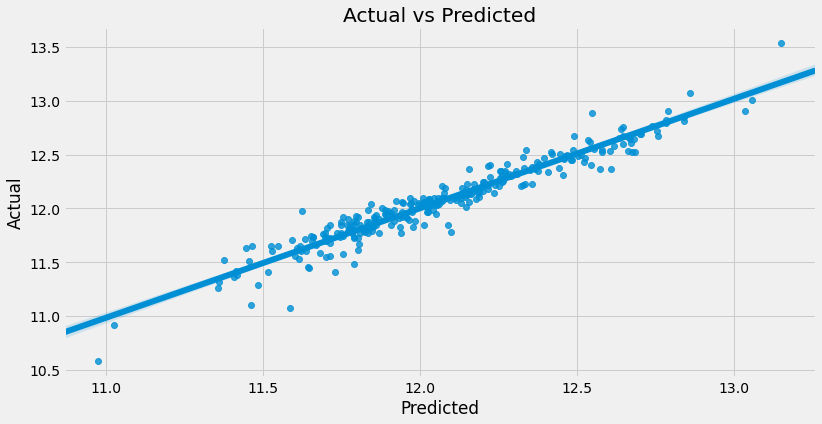

In [79]:
plt.figure(figsize=[12,6])
sns.regplot(stckPred,yTest,truncate=False)
plt.title('Actual vs Predicted')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [80]:
stckAvP = pd.DataFrame({'Actual': np.exp(yTest), 'Predicted': np.exp(stckPred)})
stckAvP

,Actual,Predicted
0,234001.0,190410.258722
1,231501.0,213253.247311
2,135001.0,136655.039637
3,80001.0,97358.132981
4,143251.0,138311.002317
...,...,...
287,140201.0,134473.854354
288,129001.0,126749.912347
289,139001.0,141568.049769
290,320001.0,346723.314016


In [81]:
frames = [LGBMMetrics,LASMetrics,LASCVMetrics,RIDMetrics,RIDCVMetrics,XGBMetrics,ADAMetrics,GRBMetrics,RFMetrics,STCKMetrics]
TrainingResult = pd.concat(frames)
TrainingResult

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
1,LightGBM,0.012752,0.112924,0.080062,0.000076,0.008725,0.914058
2,Lasso,0.010175,0.100873,0.071713,0.000061,0.007807,0.931422
3,LassoCV,0.013858,0.117722,0.085809,0.000083,0.009120,0.906600
4,Ridge,0.010664,0.103268,0.071903,0.000064,0.008007,0.928127
5,RidgeCV,0.010496,0.102448,0.071694,0.000063,0.007935,0.929263
6,XGBoost,0.014733,0.121379,0.088414,0.000088,0.009358,0.900707
7,AdaBoost,0.018350,0.135464,0.103294,0.000109,0.010460,0.876326
8,Gradient Boosting,0.010546,0.102696,0.071740,0.000063,0.007939,0.928922
9,Random Forest,0.016542,0.128615,0.093754,0.000099,0.009964,0.888515
10,Stacking,0.010980,0.104786,0.073849,0.000066,0.008120,0.925999


From the above table, we see that Lasso has the least RMSLE. But when submitted, the stacking classifier showed better performance score.

## Blending the Models

In [82]:
def blend(X):
    return((0.3*stckAttributes.predict(X)) + (0.5*lasAttributes.predict(X)) + (0.1*lgbModel.predict(X)) + (0.1*ridCVAttributes.predict(X)))

blendedPred = blend(xTest)

In [83]:
BlendMetrics = pd.DataFrame({'Model': 'Blend', 
                            'MSE': metrics.mean_squared_error(yTest, blendedPred),
                            'RMSE' : np.sqrt(metrics.mean_squared_error(yTest, blendedPred)),
                            'MAE' : metrics.mean_absolute_error(yTest, blendedPred),
                            'MSLE' : metrics.mean_squared_log_error(yTest, blendedPred), 
                            'RMSLE' : np.sqrt(metrics.mean_squared_log_error(yTest, blendedPred)),
                            'R-Square' : metrics.r2_score(yTest, blendedPred)},index=[11])

BlendMetrics

,Model,MSE,RMSE,MAE,MSLE,RMSLE,R-Square
11,Blend,0.01003,0.100152,0.0707,0.00006,0.007751,0.9324


In [84]:
SalePrice = stckAttributes.predict(testDF.to_numpy())
SalePrice = np.exp(SalePrice)

blendedPrice = blend(testDF.to_numpy())

toSubmit = pd.DataFrame({'Id' : IDTest, 'SalePrice' : blendedPrice})

toSubmit.to_csv('submission.csv', index=False) 

In [85]:
SalePrice

array([116806.50374212, 151005.71857787, 176680.86723019, ...,
       162084.56956028, 124801.71221663, 212649.52109825])